In [1]:
import os
os.chdir('/Users/federicogalbiati/Documents/GitHub/User-Study-Game-Performance-Analysis-ISU/')

In [3]:
import pandas as pd
from glob import glob

df = pd.DataFrame(columns=['game_name', 'CPU Core', 'GPU Core'])

for log in glob('data/processed/hw-study/G6/*.csv'):
    if 'metrics_' in log: continue
    game_name = os.path.basename(log).split('-')[0]
    data = pd.read_csv(log)
    data = data[['CPU Total', 'GPU Total']]
    data['game_name'] = game_name
    df = pd.concat([data, df])

df = df.groupby(['game_name']).mean()

print(df)

               CPU Total  GPU Total
game_name                          
Apex           71.299828  22.908019
AssassinCreed  49.889516  13.450249
CSGO           45.262328  24.317021
CivVI          30.660410  18.019031
Fortnite       56.149104  13.751381
GTA5           32.346246  18.011403
Hearthstone    15.657876  17.090278
LoL            31.578895  15.566757
Minecraft      94.363460  12.904472
Overwatch      59.901623  67.460366
PUBG           65.225809  30.630435
R6             44.017789  14.172414


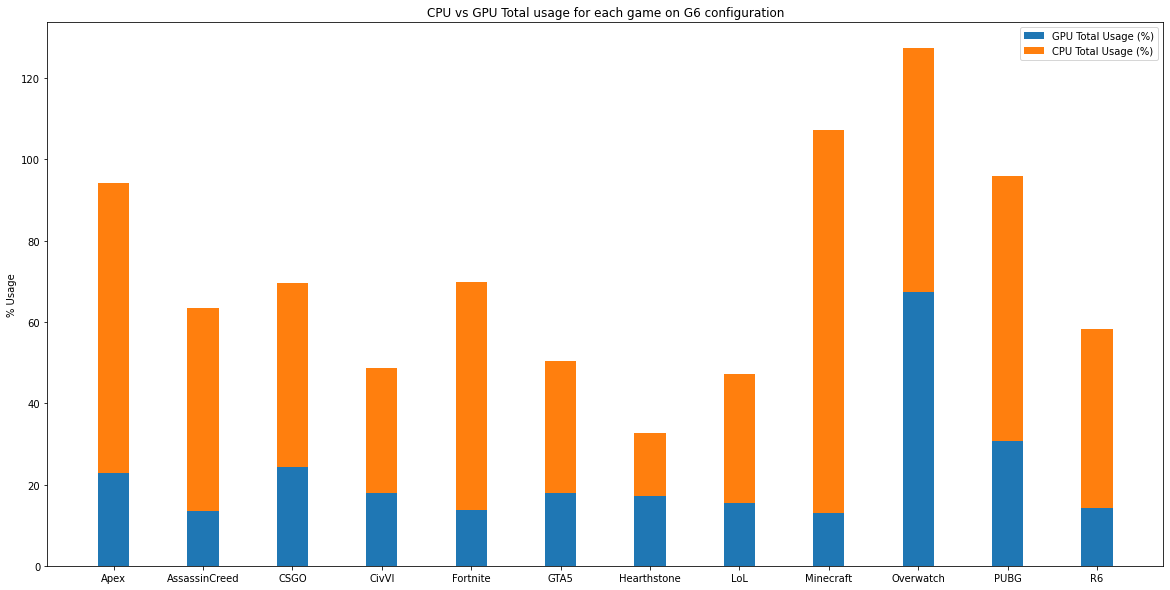

In [4]:
import matplotlib.pyplot as plt

gpu, cpu = df['GPU Total'].values, df['CPU Total'].values
labels = df.index
width = 0.35

plt.figure(figsize=(20, 10))

plt.bar(labels, gpu, width, label='GPU Total Usage (%)') # yerr=[],
plt.bar(labels, cpu, width, label='CPU Total Usage (%)', bottom=gpu) # yerr=[],

plt.title('CPU vs GPU Total usage for each game on G6 configuration')

plt.ylabel('% Usage')
plt.legend()

plt.show()